# Breast Cancer Prevision

## Introduction

In this project, our goal is to build a classification model based in Logistic Regression. We are going to talk more about Logistic Regression soon. For now, let's focus in the main aspects of the analysis.

This breast cancer database was obtained from the University of Wisconsin Hospitals. All the details about the research that generated this data can be found in the following link: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29.

## Attribute Information

The dataset is composed by 11 columns and 699 rows. Each row is related with some patient while each column represents some tumor attribute, except the first one named 'id number', that will be not relevant for our analysis. 

1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 for benign, 4 for malignant)

In the 11th column we have the results for the nature of the tumor: 2 for benign and 4 for malignant. Our goal here is to build a machine learning model that will predict the nature of the tumor based in the nine characteristics cited in the list above. The range of such characteristics, let's call then variables from now on, goes from 1 to 10. We are not going the deep in the medicinal details related to these variables, however, these nine parameters will be the dependent variables of our classification model. 

Let's begin!

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

#pd.set_option('display.max_columns', 20)
#pd.set_option('display.max_rows', 500)

In [2]:
index = ['ID', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10']
dataset = pd.read_table('breast-cancer-wisconsin.data', sep=',', names=index)
dataset

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [3]:
dataset.dtypes

ID      int64
V1      int64
V2      int64
V3      int64
V4      int64
V5      int64
V6     object
V7      int64
V8      int64
V9      int64
V10     int64
dtype: object

## Data cleaning

The dataset is almost ready, unless for one detail... The problem seems to be in column V6 where there are mixed data. Then, our fist task is to eliminate these problematic values in V6.

Let's start figuring out what are the problematic cells:

In [4]:
aux_list = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
counter = 0
for index, value in dataset['V6'].items():
    if value in aux_list:
        pass
    else:
        counter += 1
        print(index, value)

print(f'Number of problematic cells: {counter}')

23 ?
40 ?
139 ?
145 ?
158 ?
164 ?
235 ?
249 ?
275 ?
292 ?
294 ?
297 ?
315 ?
321 ?
411 ?
617 ?
Number of problematic cells: 16


Because of 16 cells our dataset wasn't ready. These cells have the question mark symbol '?' that can't be interpreted as an integer. These 16 rows corresponds to less that 2,3 % of the dataset. Once this percentage is quite small, we'll just drop these problematic columns. The remain amount of data will be enough for our classification model.

In [5]:
for index, value in dataset['V6'].items():
    if value == '?':
        dataset.drop(index, inplace=True)

In [6]:
dataset['V6'] = dataset['V6'].astype(int)
dataset.dtypes

ID     int64
V1     int64
V2     int64
V3     int64
V4     int64
V5     int64
V6     int64
V7     int64
V8     int64
V9     int64
V10    int64
dtype: object

Now the dataset is ready for the implementation of our logistic regression model. However, before we start the code implementation, a fast digression about logistic regression. 

## Logistic Regression

Assume that there are two freshman students in physics and that the semi annual calculus exam is coming. The first student is being very dedicated in the studies while the second one not that much, but he is studying a bit. So the question is which student is most likely to pass the test? 

Perhaps you are presuming that the second student certainly will fail while the first one certainly will pass. If it is true, unfortunately we'll need to disagree. Both students have chance to pass the exam, however, the probability of the first one is going to pass is greater than of the second one. 

Logistic Regression handles this kind of situation. Essentialy, considering the single variable case, let's call such variable x, a Logistic Regression model will provide to us a YES or NO type answer based on the value of x. The model also provides the probability of the YES or NO answer happens. For example, if the probability of the first student pass in the exam is 95 %, it's most likely that our model will provide the answer YES for this student. Still in exam exemple, x could be the hours of study performed by a student. 

The Logistic Regression is based in the Logistic Function (or Sigmoid's Function):

$$f(x)=\frac{L}{1+e^{-k(x-x_{0})}},$$

where $x_{0}$ is the value of the Sigmoid's midpoint, $L$ is the curve's maximum value and $k$ is the logistic growth rate or steepness of the curve.

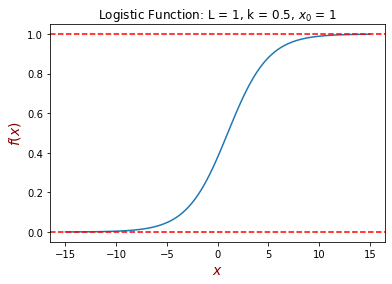

In [7]:
import matplotlib.pyplot as plt 

u = np.linspace(-15, 15, 100) 

def logistic(u):
    return 1/(1 + np.exp(-0.5*(u-1)))

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        }

f = logistic(u)
plt.plot(u, f) 
plt.xlabel("$x$", fontdict=font) 
plt.ylabel("$f(x)$", fontdict=font)
plt.title('Logistic Function: L = 1, k = 0.5, $x_0$ = 1')
plt.axhline(y=1, color='r', linestyle='--')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

The figure right above is an example of Logistic Function. Now it becomes clearer why this Logistic Regression model is useful for classification models. In the context of calculus exam exemple, a student with few hours of study will probably not pass the exam. However, from some hours of study, this probability starts to increase until reach the value of 1 (100 %). 

## Training the model

In [8]:
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [10]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

The classification model is ready! We are now capeble to predict if a tumor is benign or malignant by the **prediction** function which take some row from the test dataset (information about some patient) and makes the prevision:

In [11]:
def prediction(index):
    vec = x_test[index]
    result = classifier.predict([vec])
    if result == [2]:
        return print('The tumor is benign.')
    else:
        return print('The tumor is malignant.')

In [12]:
for index in range(8):
    prediction(index)

The tumor is benign.
The tumor is benign.
The tumor is malignant.
The tumor is malignant.
The tumor is benign.
The tumor is benign.
The tumor is benign.
The tumor is malignant.


## Accuracy of our classification

Above we computed confusion matrix, which is one of the classification metrics that evaluates the accuracy of a classification.

In [13]:
from sklearn.metrics import confusion_matrix

y_pred = classifier.predict(x_test)

cm = confusion_matrix(y_test,y_pred)
print(cm)

[[84  3]
 [ 3 47]]


The confusion matrix essentialy provides to us the match between our classification model and the real results. The diagonal elements of the matrix are the cases where both the prevision and the real observations matched. The off-diagonal terms are the opposite: cases where the prevision and the real observation don't agree.

It's easy to compute the accuracy of our model:

In [14]:
acc = ((cm[0,0]+cm[1,1])/(cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0]))*100
print(f'The accuracy of our model is {acc}.')

The accuracy of our model is 95.62043795620438.


Of course the accuracy computed above is a great indicative that our classification model is working very well. However, we need to submit our classification model to a more exigent test of validation. 

This test is named **k-fold cross-validation** ($k$-fold CV). Basically, the training set is split into k smaller sets, let's name these splits as k-folds. Once the splits were done, the model is trained using $k-1$ folds as training data. The resulting model is validated by the remaining part of the data, i.e., the fold that was "ignored" before is used as a test set to compute a performance measure, such as accuracy.

We will perform the $k$-fold CV setting $k=10$:

In [15]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(classifier, X=x_train, y=y_train, cv=10)

print(accuracies)
print('The mean accuracy is {}'.format(accuracies.mean()))
print('The standard deviation for the accuracies is {}'.format(accuracies.std()))

[0.94545455 0.96363636 0.96363636 1.         0.94545455 1.
 0.96296296 0.96296296 0.98148148 0.94444444]
The mean accuracy is 0.967003367003367
The standard deviation for the accuracies is 0.019697976894447813


After the $k$-fold CV we obtained a really good accuracy for all the 10 tests. The main accuracy is also very good as well as the standard deviation that is pretty small. Seems that our classification model is working fine!

That is all for today. I hope you enjoyed this study of case. See you next time! 